<a href="https://colab.research.google.com/github/mugdha0611/cv/blob/main/Denoising_Autoencoders_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

Splitting the Dataset in train test

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print(X_train.shape, X_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


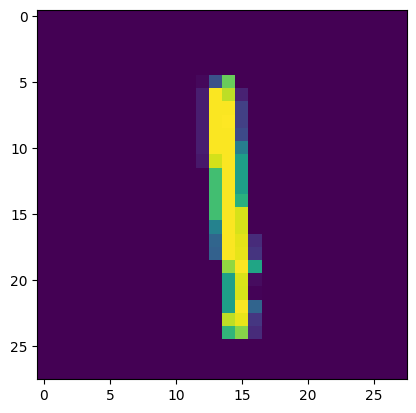

In [3]:
plt.imshow(X_train[8])

Adding Noise to the images

In [4]:
import cv2

(60000, 28, 28, 1)


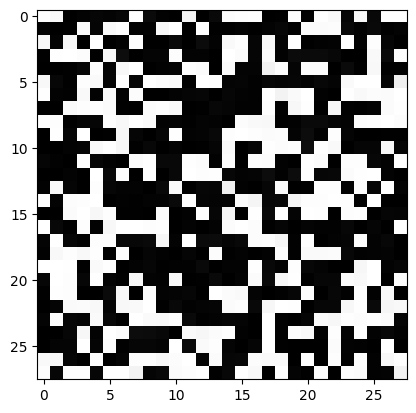

In [17]:
# Define the standard deviation for Gaussian noise
std_dev = 5

noisy_images = []
#train set noise
for image in X_train:
    noise = np.random.normal(0, std_dev, image.shape).astype(np.uint8)
    noisy_image = np.clip(image + noise, 0, 255)
    noisy_images.append(noisy_image)

# Convert the list of noisy images back to a NumPy array
noisy_images = np.array(noisy_images)
noisy_images = noisy_images / 255.0
plt.imshow(noisy_images[2])
print(noisy_images.shape)

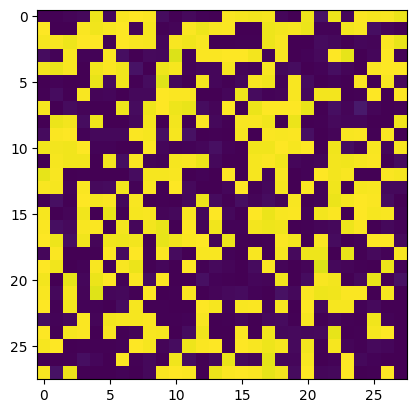

In [6]:
#test noise
std_dev = 5

noisy_images_test = []
#train set noise
for image in X_test:
    noise = np.random.normal(0, std_dev, image.shape).astype(np.uint8)
    noisy_images = np.clip(image + noise, 0, 255)
    noisy_images_test.append(noisy_images)

# Convert the list of noisy images back to a NumPy array
noisy_images_test = np.array(noisy_images_test)
noisy_images_test = noisy_images_test / 255.0
plt.imshow(noisy_images_test[2])

Autoencoder network

In [7]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      #layers.Input(shape=(7, 7, 8)),  # Adjust the input shape based on the encoder's output
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [8]:
# class Denoise(Model):
#     def __init__(self):
#         super(Denoise, self).__init__()
#         self.encoder = tf.keras.Sequential([
#             layers.Input(shape=(28, 28, 1)),
#             layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
#             layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
#             layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)
#         ])

#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
#             layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
#             layers.Conv2DTranspose(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
#         ])

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded
# autoencoder = Denoise()

In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(),run_eagerly=True)

In [10]:
noisy_images = noisy_images.reshape(-1, 28, 28, 1)
noisy_images_test = noisy_images_test.reshape(-1, 28, 28, 1)

In [18]:
print("Shape of noisy_images:", noisy_images.shape)
print("Number of samples in noisy_images:", len(noisy_images))
print(len(noisy_images_test))

Shape of noisy_images: (60000, 28, 28, 1)
Number of samples in noisy_images: 60000
10000


In [20]:
autoencoder.fit(noisy_images, noisy_images,
                epochs=10,
                shuffle=True,
                batch_size = 32,
                validation_data=(X_test, X_test ))

Epoch 1/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0247 - val_loss: 0.0454
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0223 - val_loss: 0.0476
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0209 - val_loss: 0.0389
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0202 - val_loss: 0.0400
Epoch 5/10
 583/1875 [========>.....................] - ETA: 40s - loss: 0.0193

KeyboardInterrupt: ignored

In [13]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

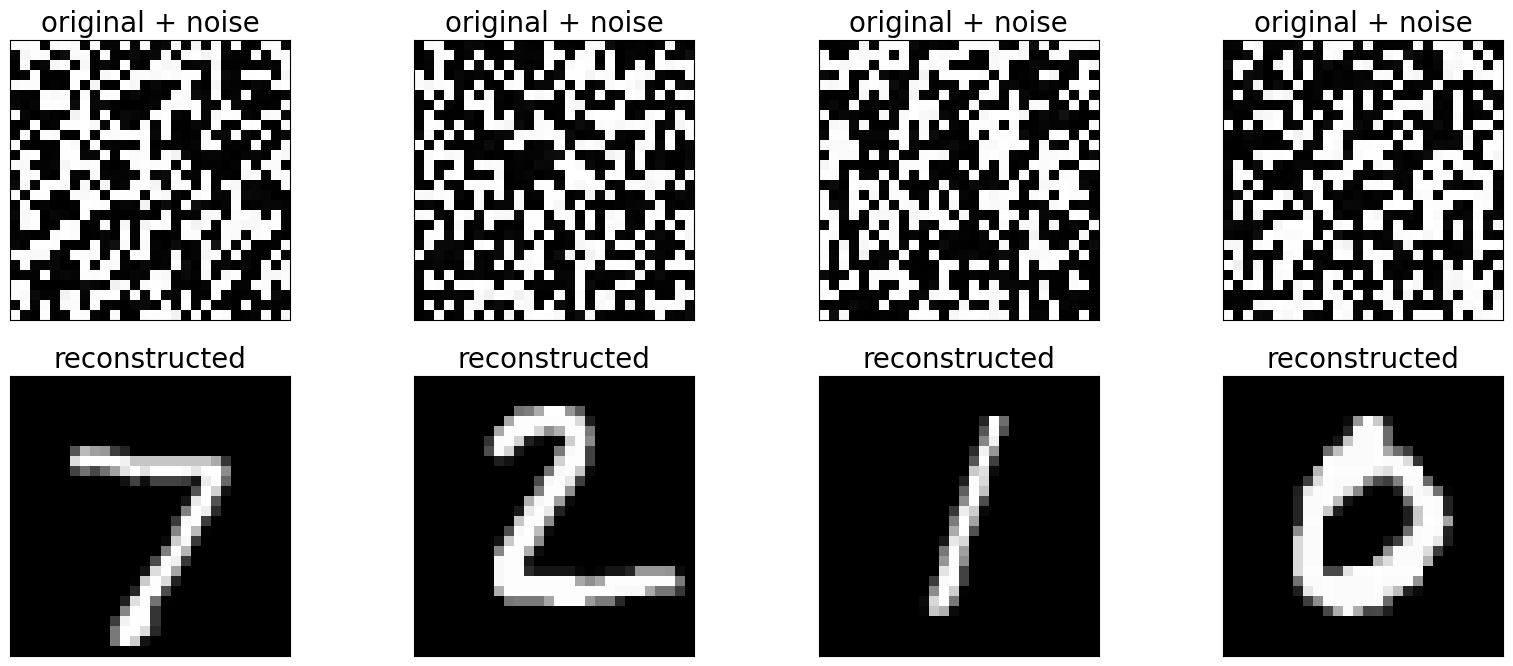

In [21]:
n = 4
plt.figure(figsize=(20, 8))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise",fontsize=20)
    plt.imshow(tf.squeeze(noisy_images_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed",fontsize=20)
    plt.imshow(tf.squeeze(X_test[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()